## No.1

This file would read one single ogg file and visualize it. try to use FFT to transfer the audio file between time domain and frequence domain

In [1]:
! conda install librosa==0.10.1 -y -qqq

Channels:
 - conda-forge
Platform: osx-arm64
Solving environment: ...working... done

# All requested packages already installed.



In [1]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

In [2]:
print(librosa.__version__)


0.10.1


In [3]:
# load ogg file

audio_path='../../data/train/asbfly/XC134896.ogg'

y, sr =librosa.load(audio_path,sr=None) # sr is sampling rate, None represents do not resampling

In [4]:
print(y)
print(y.shape)
print(type(y))

[ 1.3738355e-06  9.2570730e-07 -2.7168735e-06 ...  6.2165782e-06
 -1.4831389e-06 -3.4762086e-06]
(875207,)
<class 'numpy.ndarray'>


In [5]:
print(sr) # represents 32KHZ

# 32 kHz usually refers to the sampling rate, which is the number of times a sound sample is collected per second. 
# A sampling rate of 32 kHz means that the sound signal is sampled 32,000 times per second.

32000


In [6]:
# step 2: implement Fast Fourier Transform
fft = np.fft.fft(y)
magnitude = np.abs(fft)
frequency = np.linspace(0, sr, len(magnitude))

In [7]:
print(fft)
print(fft.shape)

[ 0.00105125+2.77555756e-15j  0.00032407+2.07086359e-03j
 -0.00287135+3.68859858e-04j ... -0.00028772+3.39738671e-03j
 -0.00287135-3.68859858e-04j  0.00032407-2.07086359e-03j]
(875207,)


In [8]:
print(magnitude)
print(magnitude.shape)
print(type(magnitude))

[0.00105125 0.00209607 0.00289494 ... 0.00340955 0.00289494 0.00209607]
(875207,)
<class 'numpy.ndarray'>


In [10]:
print(frequency)
print(frequency.shape)

[0.00000000e+00 3.65628206e-02 7.31256413e-02 ... 3.19999269e+04
 3.19999634e+04 3.20000000e+04]
(875207,)


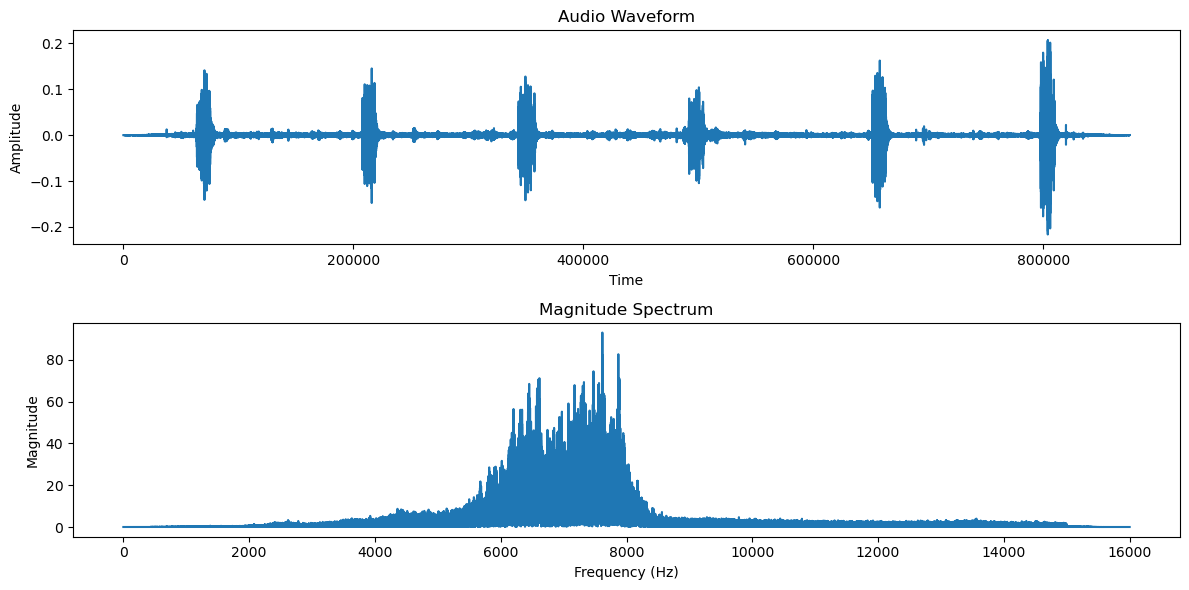

In [11]:
# step 3: Draw an audio waveform
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1) 
plt.plot(y)
plt.title('Audio Waveform')
plt.xlabel('Time')
plt.ylabel('Amplitude')

# Step 4: Plot the Spectrum
half_len = len(magnitude) // 2  # Due to symmetry, only half of the spectrum needs to be plotted
plt.subplot(2, 1, 2)
plt.plot(frequency[:half_len], magnitude[:half_len])
plt.title('Magnitude Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

plt.tight_layout()
plt.show()

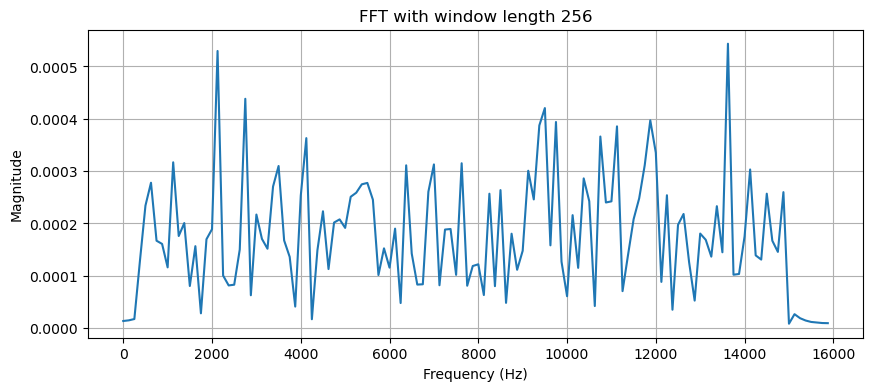

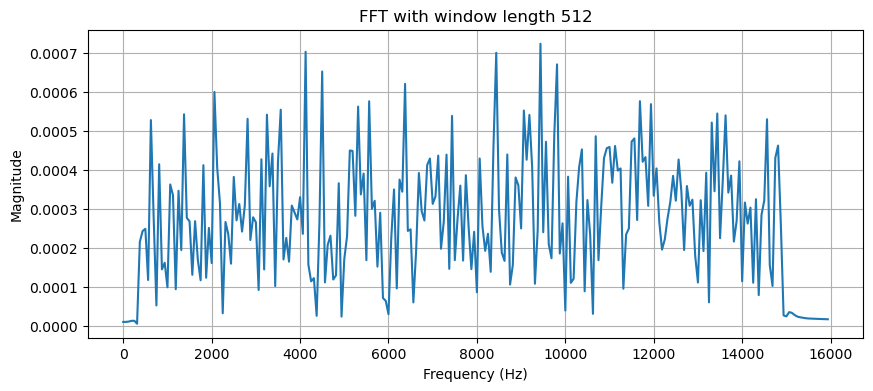

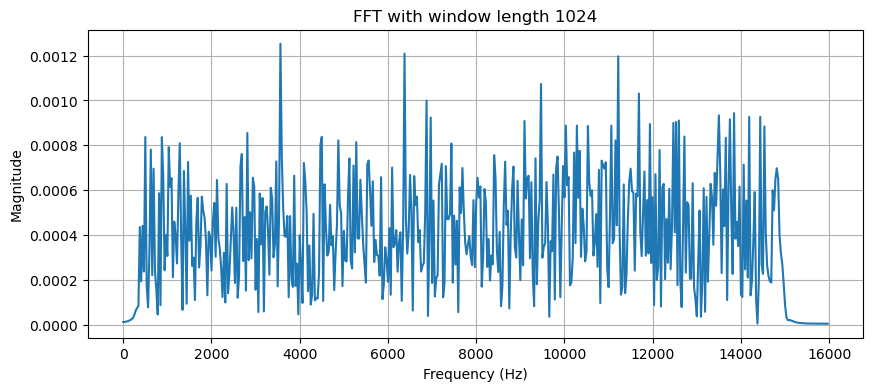

In [2]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

# loag ogg file
def load_audio(file_path):
    # use librosa read audio file
    signal, sr = librosa.load(file_path, sr=None, mono=True)
    return signal, sr

# execute FFT
def perform_fft(signal,sr, n_fft):
    # calculate FFT
    fft_result = np.fft.fft(signal, n=n_fft)[:n_fft // 2]  # 只取正频率部分
    frequencies = np.fft.fftfreq(n_fft, 1/sr)[:n_fft // 2]
    return frequencies, np.abs(fft_result)

# Plotting a signal in the frequency domain
def plot_fft(frequencies, fft_result, title):
    plt.figure(figsize=(10, 4))
    plt.plot(frequencies, fft_result)
    plt.title(title)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.grid(True)
    plt.show()


def main(file_path):
    signal, sr = load_audio(file_path)
    window_lengths = [256, 512, 1024]  # Define different window lengths

    for n_fft in window_lengths:
        frequencies, fft_result = perform_fft(signal, sr,n_fft)
        plot_title = f'FFT with window length {n_fft}'
        plot_fft(frequencies, fft_result, plot_title)

# invoke the main function and pass in the OGG file path
main('../../data/train/asbfly/XC134896.ogg')
